# Infiltration into soils using the green ampt model

In [288]:
import numpy as np
import matplotlib.pyplot as plt

The Green Ampt Model

$$t = \frac{i_t - \Delta\theta \Delta h \ln(1 + \frac{i_t}{\Delta\theta \Delta h})}{K_s}$$

where $t$ is the time, $i_t$ is the cumulative infiltration, $\Delta\theta$ is the difference between the initial and wetted soil water content, $\Delta h$ is the difference between the initial and final soil water potential, and $K_s$ is the saturated hydraulic conductivity of the soil.

In [289]:
def t_for_cum_inf(i_t, d_theta, d_h, Ks):
    return (i_t - d_theta * d_h * np.log(1+ (i_t/(d_theta*d_h))))/Ks

def short_time_approximation(d_theta, d_h, K, t):
    """Short time approximation for cumulative infiltration
    Parameters
    ----------
    d_theta : float
        Change in volumetric water content
    d_h : float
        Change in pressure head
    K : float
        Hydraulic conductivity
    t : array_like
        Time
    Returns
    -------
    i_t : array
        Cumulative infiltration"""

    return np.sqrt((d_theta*d_h*K)/(2*t))

def long_time_approximation(K, x):
    """Long time approximation for cumulative infiltration
    Parameters
    ----------
    K : float
        Hydraulic conductivity
    t : array_like
        Time
    Returns
    -------
    K : float
        Hydraulic conductivity"""
    
    it_long = np.array([K]*len(x))

    return it_long

def d_h(h0, hf):
    return h0 - hf

def d_theta(theta_0, theta_i):
    return theta_0 - theta_i

# Add sliders for:
Ks (K), h0, hf, theta_i, theta_0
Add button to add reference scenario

In [290]:
h0 = 0
hf = -60
theta_i = 0.2
theta_0 = 0.44
Ks = 4

delta_h = d_h(h0, hf)
delta_theta = d_theta(theta_0, theta_i)

In [291]:
hf2 = -200
theta_i2 = 0.07
Ks2 = 0.3

delta_theta2 = d_theta(theta_0, theta_i2)
delta_h2 = d_h(h0, hf2)



In [292]:
I_t = np.arange(0, 260, 0.1)

### Calculate t

In [293]:
t = t_for_cum_inf(I_t, delta_theta, delta_h, Ks)
t_2 = t_for_cum_inf(I_t, delta_theta2, delta_h2, Ks2)
#t_3 = t_for_cum_inf(I_t, delta_theta, delta_h, Ks2)
#t_4 = t_for_cum_inf(I_t, delta_theta2, delta_h, Ks2)

In [294]:
new_x = np.arange(round(t[0], 1), round(t[-1], 1), 0.01)
y2 = np.interp(new_x, t, I_t)
diff = np.diff(y2)

y3 = np.interp(new_x, t_2, I_t)
diff2 = np.diff(y3)

### Calculate the infiltration rate

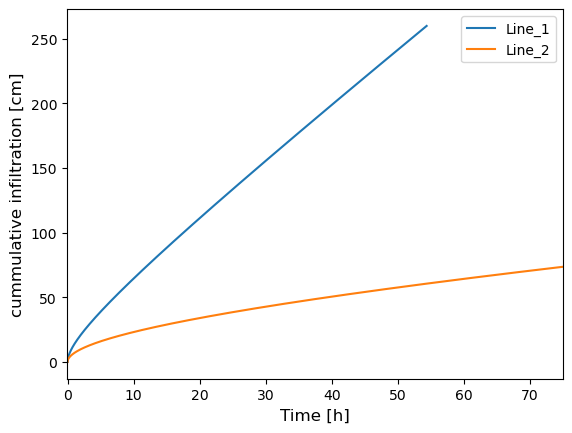

In [295]:
fig, ax = plt.subplots()
ax.plot(t, I_t)
ax.plot(t_2, I_t)
#ax.plot(t_3, I_t, linestyle = '-.')
#ax.plot(t_4, I_t, linestyle = ':', color = 'black')
ax.set_xlim(xmin = -0.1, xmax = 75)

ax.set_xlabel('Time [h]', fontsize = 12)
ax.set_ylabel('cummulative infiltration [cm]', fontsize = 12)

ax.legend(['Line_1', 'Line_2'])

In [296]:
# compute the short time approximation
i_t_short = short_time_approximation(delta_theta, delta_h, Ks, new_x)

# compute the long time approximation
i_t_long = long_time_approximation(Ks, new_x)

C:\Users\matth\AppData\Local\Temp\ipykernel_14840\591538641.py:21: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt((d_theta*d_h*K)/(2*t))


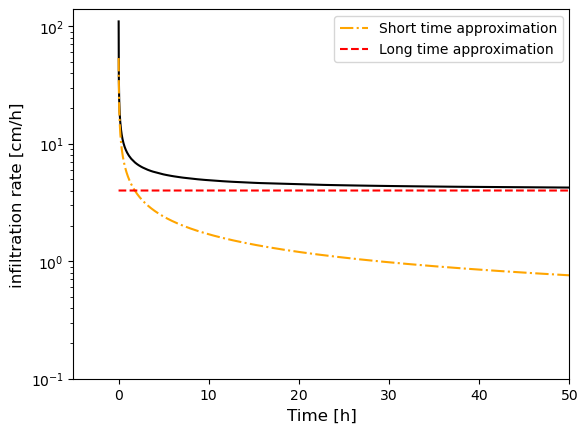

In [297]:
fig, ax = plt.subplots()
ax.plot(new_x[1:-5], diff[:-5]*100, color = 'black')
#ax.plot(new_x[1:-5], diff2[:-5]*100, color = 'blue', linestyle = '--')

ax.plot(new_x, i_t_short, 'orange', linestyle = '-.', label='Short time approximation')
ax.plot(new_x, i_t_long, 'red', linestyle = '--', label='Long time approximation')

ax.set_ylim(0.1, 140)
ax.set_xlim(-5, 50)

plt.yscale('log')

ax.set_xlabel('Time [h]', fontsize = 12)
ax.set_ylabel('infiltration rate [cm/h]', fontsize = 12)

ax.legend()


### Task 2

In [298]:
Ks = 1.1 #mm/H
h0 = 0 
hf = [-11.0, -11.0, -25.0, -25.0]
theta_i = [0.190, 0.085, 0.190, 0.085]
theta_0 = 0.437

In [299]:
# define the time array
I_t = np.arange(0, 60, 0.001)

In [300]:
diff = []
xax = []
tl = []
for i in np.arange(0, 4):
    th_i = theta_i[i]
    h_f = hf[i]

    t = t_for_cum_inf(I_t, d_theta(theta_0, th_i), d_h(h0, h_f), Ks)
    
    new_x = np.arange(round(t[0], 1), round(t[-1], 1), 0.001)
    y = np.interp(new_x, t, I_t)
    dy = np.diff(y)
    
    diff.append(dy)
    xax.append(new_x)
    tl.append(t)

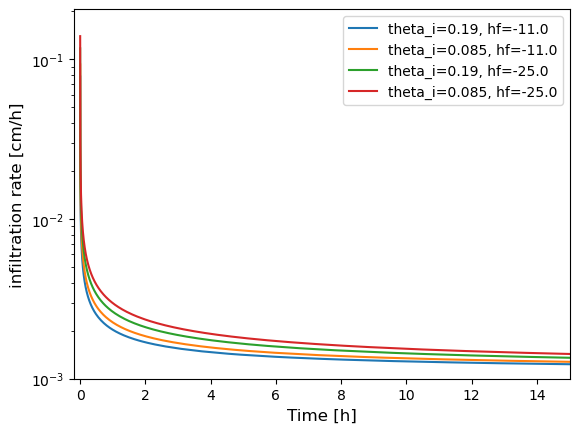

In [301]:
fig, ax = plt.subplots()
for i in range(0,4):
    
    ax.plot(xax[i][1:], diff[i], label="theta_i=" + str(theta_i[i]) + ", hf=" + str(hf[i]))
    
plt.yscale('log')

ax.set_xlim(xmin = -0.2, xmax = 15)
ax.set_ylim(ymin = 10**-3)

ax.set_xlabel('Time [h]', fontsize = 12)
ax.set_ylabel('infiltration rate [cm/h]', fontsize = 12)

ax.legend()


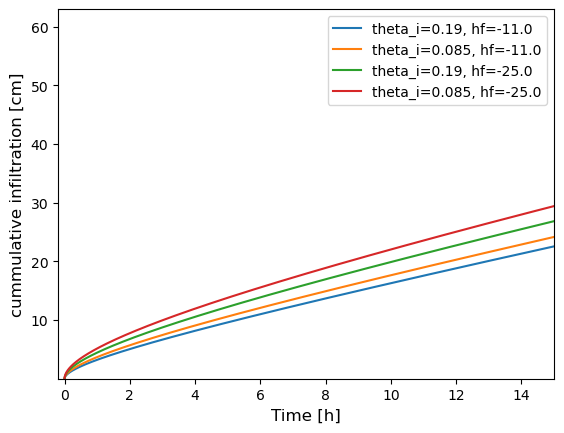

In [302]:
fig, ax = plt.subplots()
for i in range(0,4):
    
    ax.plot(tl[i], I_t, label="theta_i=" + str(theta_i[i]) + ", hf=" + str(hf[i]))
    

ax.set_xlim(xmin = -0.2, xmax = 15)
ax.set_ylim(ymin = 10**-3)

ax.set_xlabel('Time [h]', fontsize = 12)
ax.set_ylabel('cummulative infiltration [cm]', fontsize = 12)

ax.legend()